<a href="https://colab.research.google.com/github/moskalt/DLnotebooks/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from google.colab import files
from io import BytesIO
from IPython.display import Image
from PIL import Image as Image2
from skimage.exposure import rescale_intensity
from matplotlib.pyplot import imshow
import cv2 as cv


In [ ]:
uploaded = files.upload()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

filename = 'photo.png'
filename_test = 'test2.png'

In [ ]:
img = Image(filename_test)

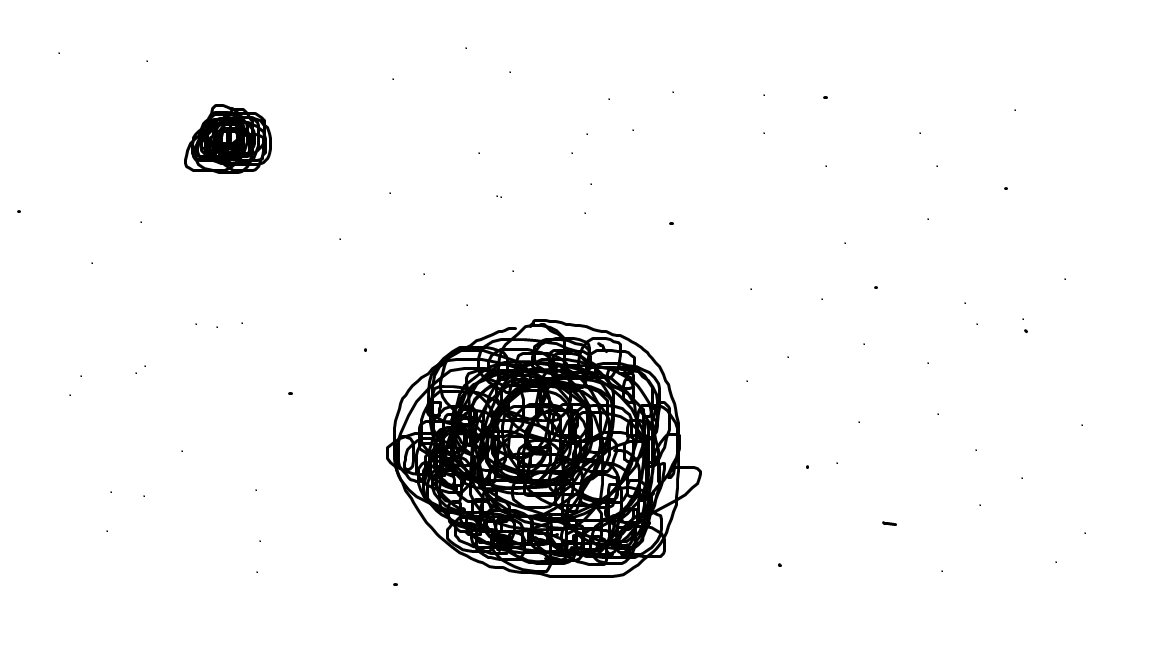

In [ ]:
display(img)

# KERNEL_NOISE_SIZE depends on size of figures on picture

In [ ]:
KERNEL_NOISE_SIZE = 5 # must be < kernel sizes 

In [ ]:
noise_mask = np.ones((KERNEL_NOISE_SIZE, KERNEL_NOISE_SIZE),dtype=np.float32)

In [ ]:
noise_mask[KERNEL_NOISE_SIZE//2][KERNEL_NOISE_SIZE//2] = 0

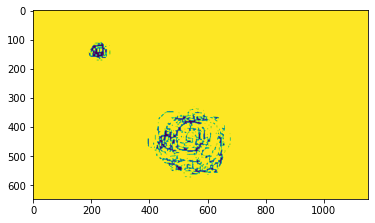

In [ ]:
image = cv.imread(filename_test)
gr = cv.cvtColor(image, cv.COLOR_BGRA2GRAY)
gr = gr
gr = cv.filter2D(gr, -1, noise_mask)
imshow(gr)


In [ ]:
KERNEL_OPEN_SIZE = np.max(gr.shape)//40
KERNEL_EROSION_SIZE = np.max(gr.shape)//65
KERNEL_GRADIENT_SIZE = np.max(gr.shape)//100
ITERATIONS = 2

In [ ]:

open_kernel = np.ones((KERNEL_OPEN_SIZE, KERNEL_OPEN_SIZE), np.uint8)
erosion_kernel = np.ones((KERNEL_EROSION_SIZE, KERNEL_EROSION_SIZE), np.uint8)
gradient_kernel = np.ones((KERNEL_GRADIENT_SIZE, KERNEL_GRADIENT_SIZE), np.uint8)
opening = cv.morphologyEx(gr, cv.MORPH_OPEN, open_kernel)
erosion = cv.erode(opening, erosion_kernel, iterations = ITERATIONS) 
gradient = cv.morphologyEx(erosion, cv.MORPH_GRADIENT, gradient_kernel)
closing = cv.morphologyEx(gradient, cv.MORPH_CLOSE, open_kernel)


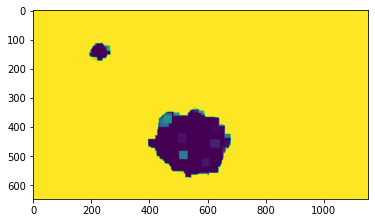

In [ ]:
imshow(opening)

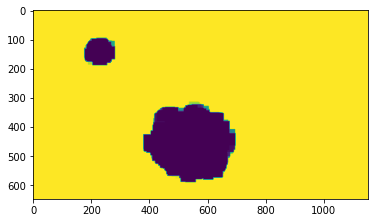

In [ ]:
imshow(erosion)

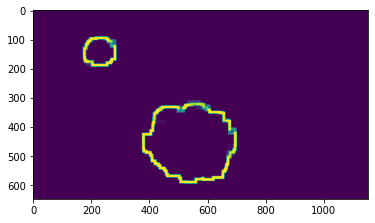

In [ ]:
kernel3 = np.ones((7,7), np.uint8)
imshow(gradient)

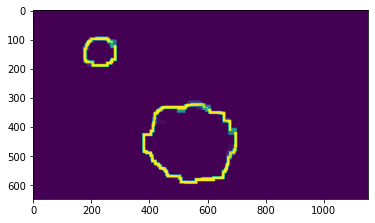

In [ ]:
imshow(closing)

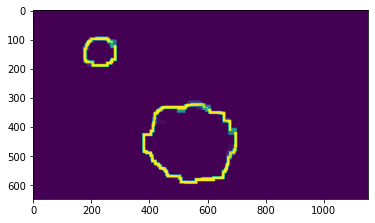

In [ ]:
imshow(closing)

In [ ]:
save_img = Image2.fromarray(closing)
save_img.save('final.png')